In [24]:
# Happiness Score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from scipy.stats import zscore
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [25]:
# Data Selection
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df.shape

(158, 12)

In [26]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [27]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [28]:
# Checking for missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [29]:
# Transforming Dataset
df[["Country", "Region","Happiness Rank"]] = df[["Country", "Region","Happiness Rank"]].apply(LabelEncoder().fit_transform)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<function matplotlib.pyplot.show(close=None, block=None)>

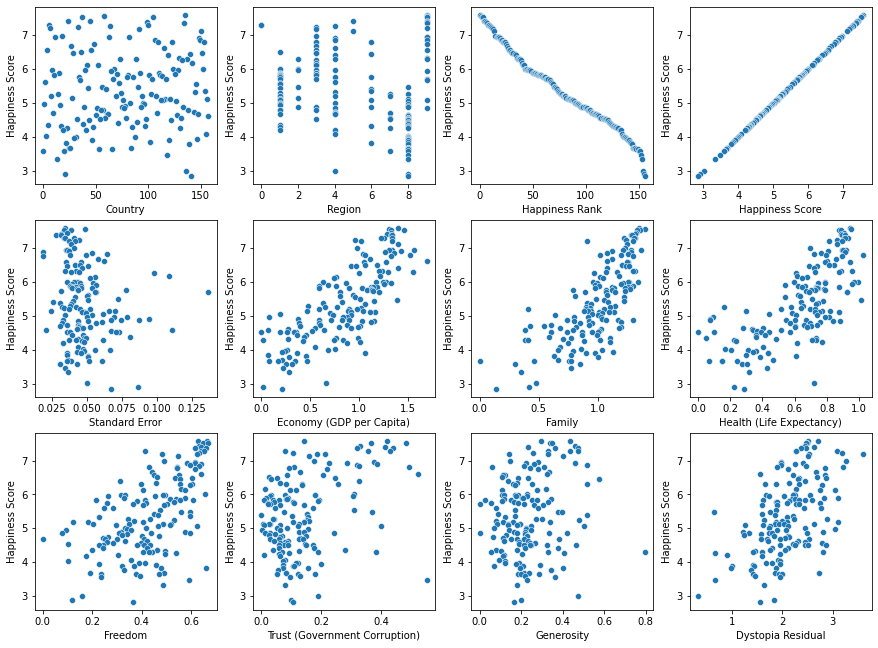

In [30]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<= 12 :
        ax=plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=df[column],y="Happiness Score",data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show

In [31]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098804,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213092,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098804,0.213092,1.000000,-0.992418,0.158201,-0.785211,-0.733899,-0.735642,-0.557051,-0.372752,-0.160446,-0.522339
Happiness Score,0.083380,-0.176791,-0.992418,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158201,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785211,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733899,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735642,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.557051,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372752,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


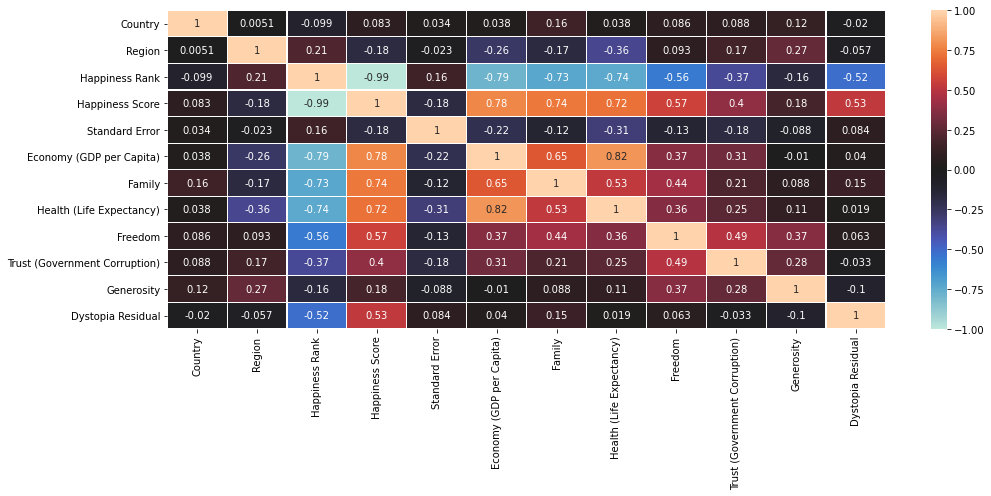

In [32]:
plt.figure(figsize=(15,7)) 
sns.heatmap(df.corr(),vmin=-1, vmax=1, center=0,annot=True,fmt='.2g', linewidths=.1, )
plt.tight_layout()

In [33]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,78.018987,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.321705,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,0.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,39.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,78.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,116.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,156.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


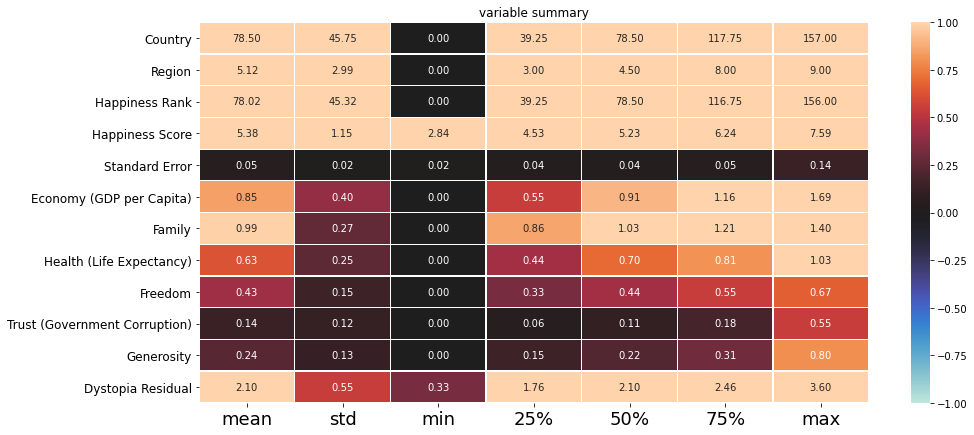

In [34]:
plt.figure(figsize=(15,7)) 
sns.heatmap(round(df.describe()[1:].transpose(),2),vmin=-1, vmax=1, center=0,annot=True,fmt='.2f', linewidths=.2, )
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variable summary")
plt.show()

In [35]:
#df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    int32  
 1   Region                         158 non-null    int32  
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 13

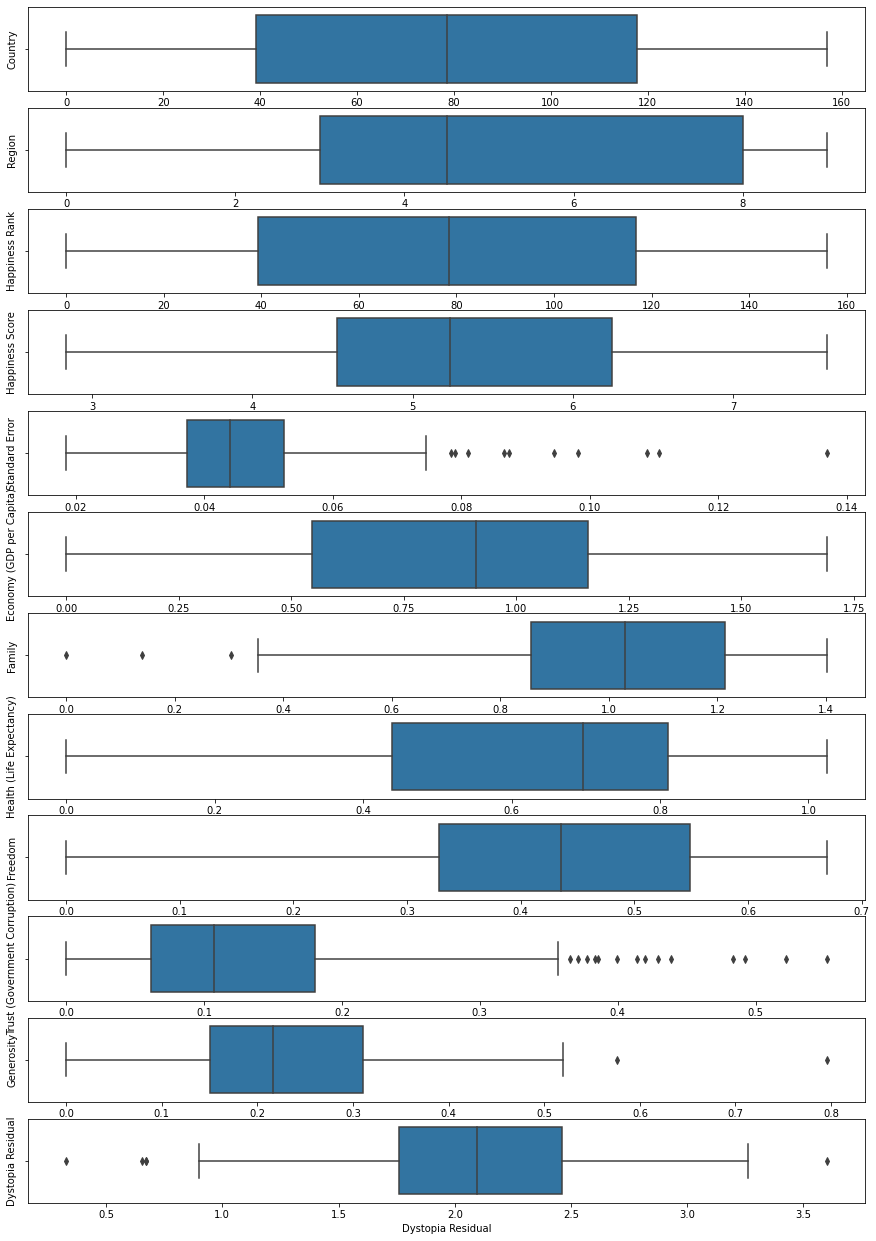

In [36]:
#check for outliers
num_cols =df.select_dtypes(include = np.number)
plt.figure(figsize=(15,22))
for i,col in enumerate(num_cols,1):
    plt.subplot(12,1,i)
    sns.boxplot(df[col])
    plt.ylabel(col)
plt.show()

In [37]:
#Check for Skweness
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                  -0.001271
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

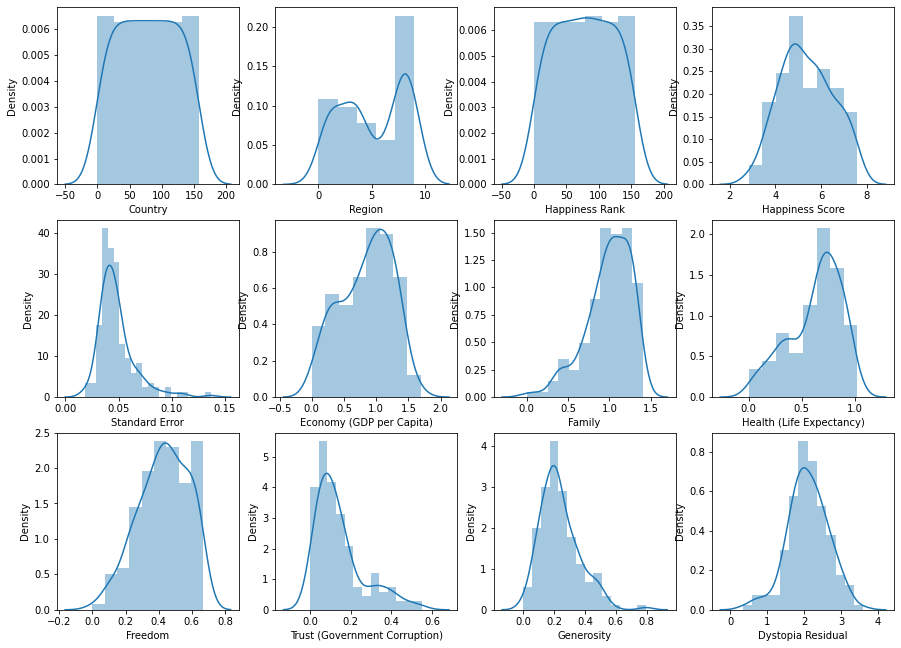

In [38]:
# check Correlation with Target Variable
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<= 12 :
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show

In [39]:
#check for duplicate Rows
dups=df.duplicated()
print(dups.any())

False


In [40]:
# Check Strongly Related Features
cor = df.corr()
cor_target = abs(cor["Happiness Score"])
strong_related = cor_target[cor_target>0.2]
print("Strongly Related:\n\n",strong_related,"\n")

weak_related = cor_target[cor_target<0.2]
print("Weak Relates:\n\n",weak_related)

Strongly Related:

 Happiness Rank                   0.992418
Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64 

Weak Relates:

 Country           0.083380
Region            0.176791
Standard Error    0.177254
Generosity        0.180319
Name: Happiness Score, dtype: float64


In [41]:
# Delete Column 
df=df.drop(["Happiness Rank","Region"],axis=1)
df

,Country,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,118,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [42]:
z=np.abs(zscore(df))
z.shape

(158, 10)

In [43]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([7, 2, 2, 2, 8, 4, 7, 9, 4], dtype=int64))


In [44]:
# Removing Outliers
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)

(149, 10)


In [45]:
#divide Dataset in Feature and Target
y=df_new.iloc[:,1]
x=df_new.iloc[:,[0,2,3,4,5,6,7,8,9]]

In [46]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.19015533, -0.95033703,  1.49245411, ...,  1.81762512,
         0.65957854,  0.75525527],
       [-0.30048669,  0.37856182,  1.19406711, ...,  0.32967609,
         1.56260401,  1.11116834],
       [-0.80205671, -1.04140135,  1.26661161, ...,  1.95339954,
         0.97722591,  0.70649452],
       ...,
       [-2.10537769, -1.32081011, -1.36521585, ..., -0.19284338,
         1.13425805, -0.32711524],
       [-1.50728158, -0.69272644, -1.43304072, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [-1.24683102,  2.17876604, -1.93874732, ..., -0.14727362,
        -0.17248609, -0.55359235]])

In [47]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.19015533, -0.95033703,  1.49245411, ...,  1.81762512,
         0.65957854,  0.75525527],
       [-0.30048669,  0.37856182,  1.19406711, ...,  0.32967609,
         1.56260401,  1.11116834],
       [-0.80205671, -1.04140135,  1.26661161, ...,  1.95339954,
         0.97722591,  0.70649452],
       ...,
       [-2.10537769, -1.32081011, -1.36521585, ..., -0.19284338,
         1.13425805, -0.32711524],
       [-1.50728158, -0.69272644, -1.43304072, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [-1.24683102,  2.17876604, -1.93874732, ..., -0.14727362,
        -0.17248609, -0.55359235]])

In [48]:
# split Dataset 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

Score On Train Data: 0.9953313400520751
Score On Test Data: 0.9904756254971216


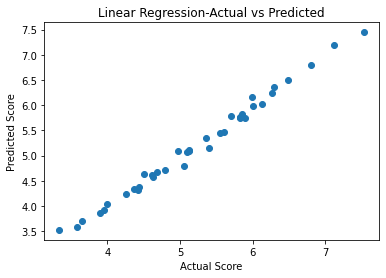

Mean Absolute Error: 0.07302316405622582
Mean Squared Error: 0.009438655211502401
Root Mean Squared Error: 0.09715274165715758


In [49]:
# MOdel Building using Linear Regression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])
#y_pred.head(2)


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('Score On Test Data:',r2_score_test)


plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Linear Regression-Actual vs Predicted')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [50]:
# Model Saving
import pickle
filename='Happiness_Score.pk1'
pickle.dump(regressor,open(filename,'wb'))

In [51]:
df_com=pd.DataFrame({})
df_com["Original"]=y_test
df_com["Pridected"]=regressor.predict(x_test)
#df_com

Score On Train Data: 0.9952491773991565
Score On Test Data: 0.990265659275926


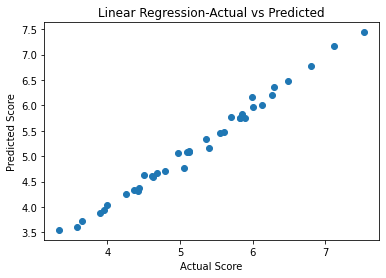

Mean Absolute Error: 0.07391934612883187
Mean Squared Error: 0.009646731738452152
Root Mean Squared Error: 0.09821777709993315


In [52]:
regressor = LassoCV()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])
#y_pred.head(2)


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('Score On Test Data:',r2_score_test)


plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Linear Regression-Actual vs Predicted')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score On Train Data: 0.995302372988409
Score On Train Data: 0.9904298402129559


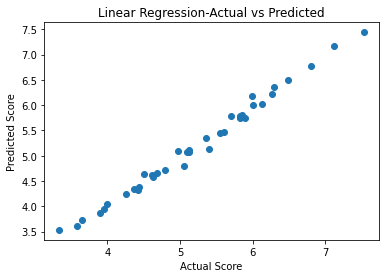

Mean Absolute Error: 0.07303026994808443
Mean Squared Error: 0.009484028428491173
Root Mean Squared Error: 0.0973859765494559


In [53]:
regressor = Ridge()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])
#y_pred.head(2)


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('Score On Train Data:',r2_score_test)


plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Linear Regression-Actual vs Predicted')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score On Train Data: 0.9953310361823761
Score On Train Data: 0.9904752467124541


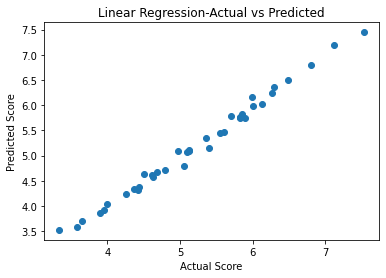

Mean Absolute Error: 0.07300696810590947
Mean Squared Error: 0.009439030587111015
Root Mean Squared Error: 0.09715467352171493


In [54]:
regressor = RidgeCV()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])
#y_pred.head(2)


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('Score On Train Data:',r2_score_test)

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Linear Regression-Actual vs Predicted')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))